## Lead scoring case study
The goal of this case study is to identify the users who are likely to convert so the team at X Education can better allocate the man power.

Here are the steps for this case study- 
> 1\. Data understanding \
> 2\. Data preparation
>> 2.1\. Categorical variables
>>> 2.1.1\. Treating "Select" in certain columns \
>>> 2.1.2\. Removing columns with high null values \
>>> 2.1.3\. Removing columns with Zero or low variance
>>>
>> 2.2\. Numeric variables
>>> 2.2.1\. Outlier Treatment \
>>> 2.2.2\. Feature Engineering \
>>> 2.2.3\. Imputing Missing value
>>>
>>
> 3\. Dummy variables creation
>> 3.1\. Variables with null \
>> 3.2\. Variables without null

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# so we dont get data omitted
pd.set_option("display.max_columns",500)
pd.set_option("display.max_colwidth",200)

In [3]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1. Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [6]:
df.describe(include="all")

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [7]:
df.Converted.sum()/df.shape[0]

0.3853896103896104

Lead conversation rate is around 38% for the current data set.

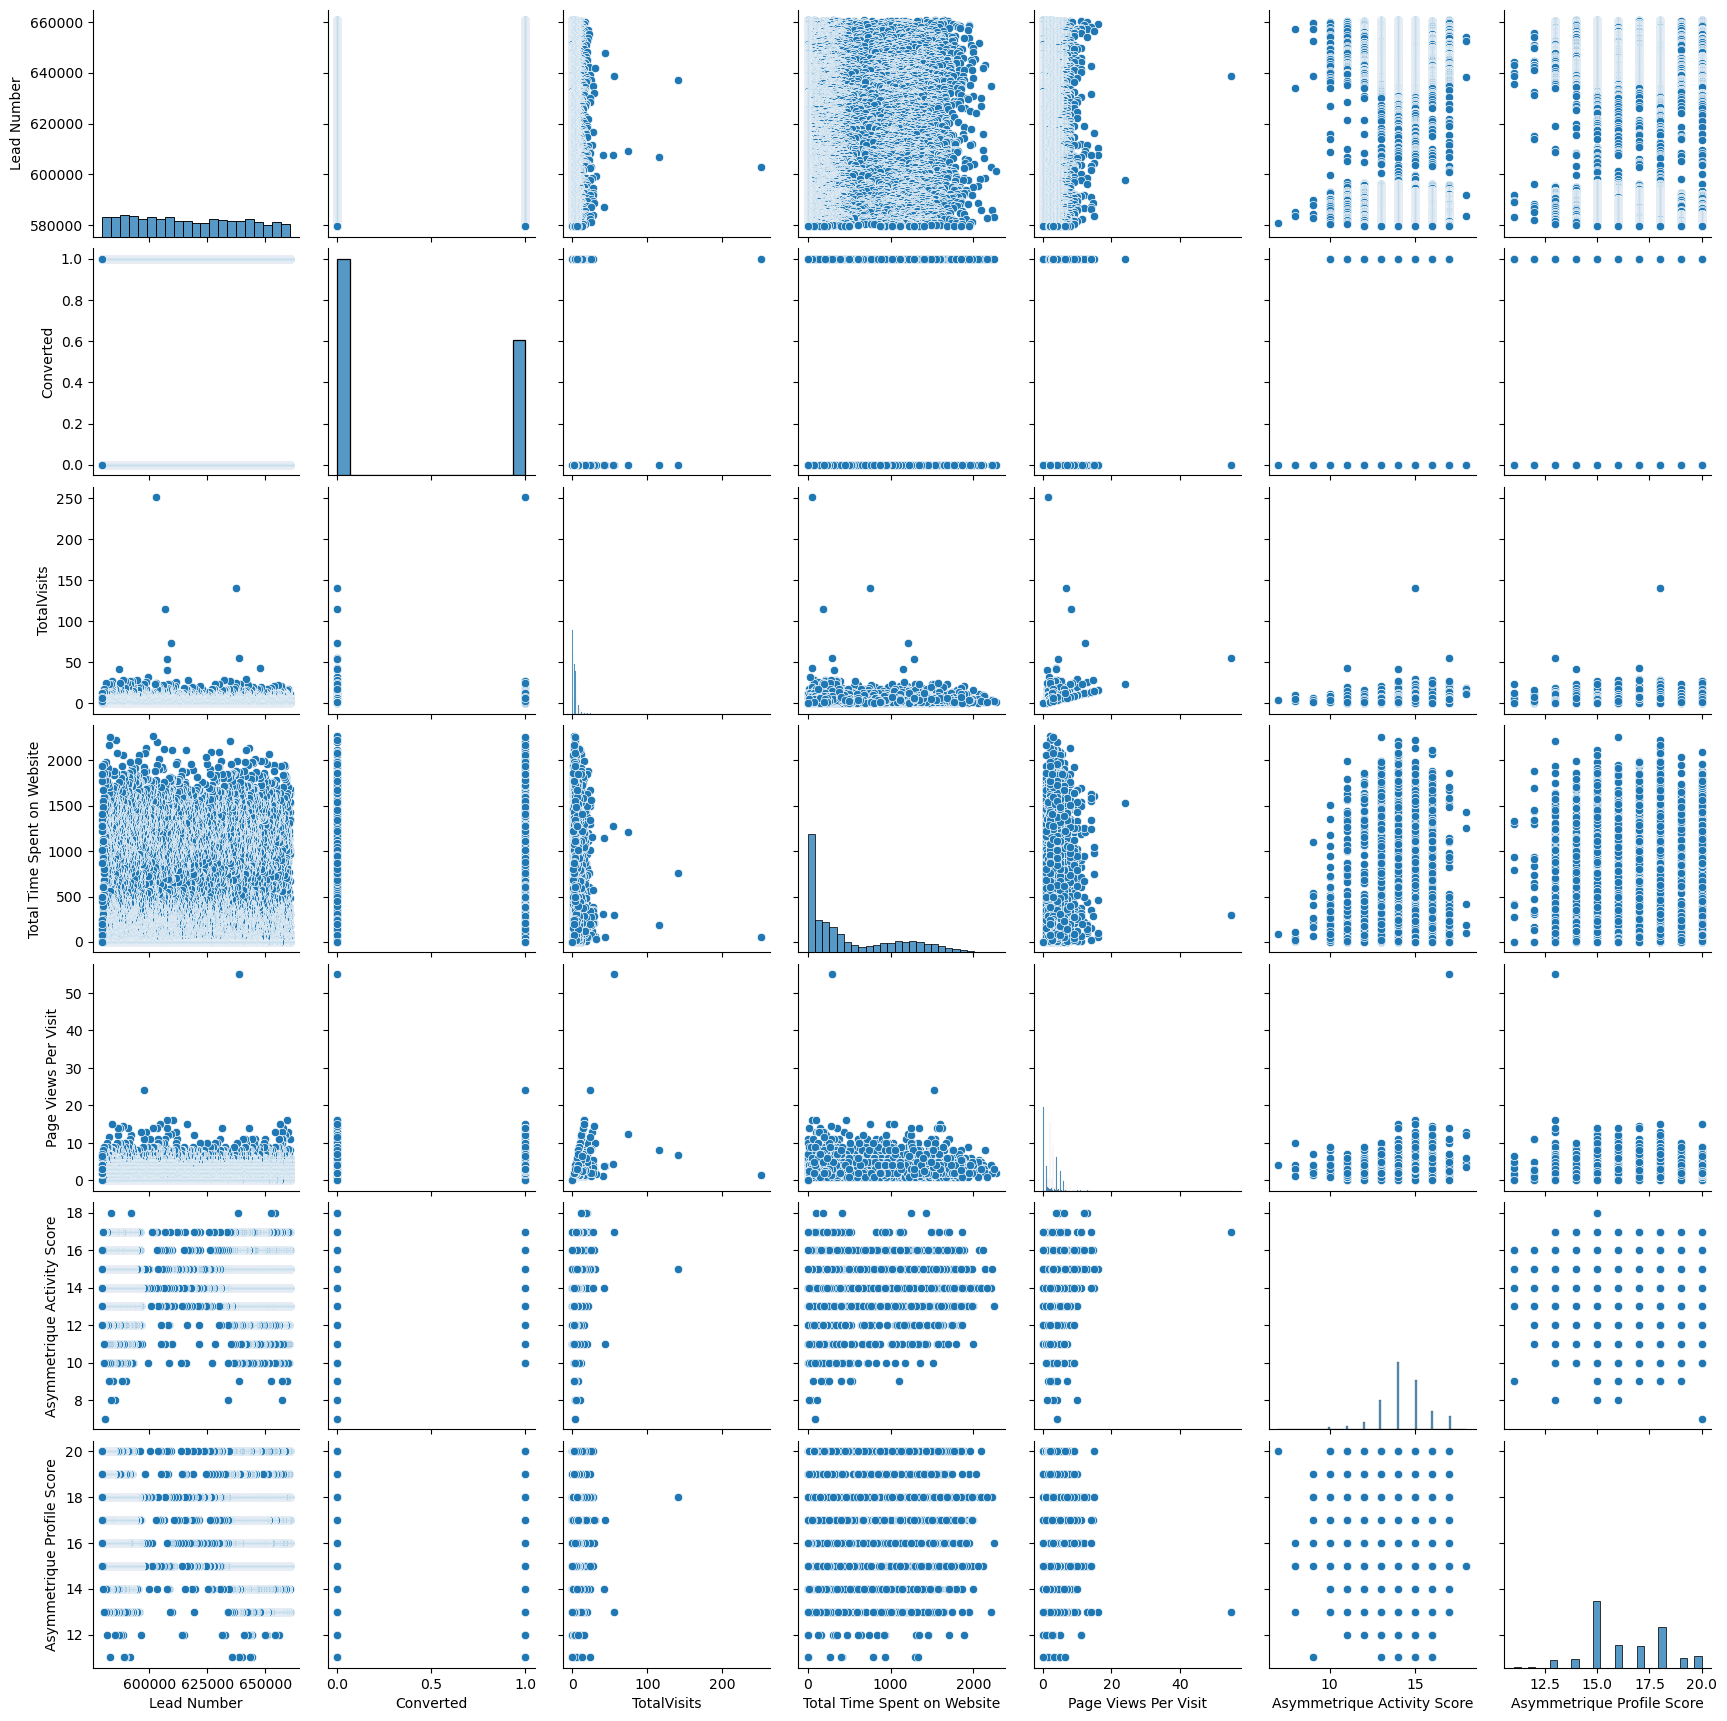

In [8]:
sns.pairplot(df)

## 2. Data preparation

In [9]:
#### Prospect ID and Lead Number are unique for every row, so they should be removed asap
df = df.drop(columns=["Prospect ID","Lead Number"], axis=1)
# df = df.drop(columns=["Prospect ID"], axis=1)

### 2.1. Categorial columns

Function to check and visualize all the categorical variables to get better understanding of very column and make decsion about how to impute missing values

In [10]:
def createBarPlot(category, df):
    sns.barplot(x=category, y="Converted", data=df, estimator='mean')
    plt.xlabel(category)
    plt.ylabel('Mean Converted')
    plt.xticks(rotation=90)
    plt.show()

def checkCategoricalColumn(col_name, df):
    values = df[col_name].dropna().unique()

    # add first line for printing
    data = [{"Value":"Value", "converted":"Converted", "frequency":"Frequency", "percent":"Converted-Percentage"}]
    
    for val in values:
        converted = df[df[col_name]==val]["Converted"].sum()
        frequency = df[df[col_name]==val][col_name].count()
        data.append({"Value":val, "converted":converted, "frequency":frequency, "percent":round(converted/frequency*100,2)})

    if (df[col_name].isnull().sum()):
        converted = df[df[col_name].isnull()]["Converted"].sum()
        frequency = df[col_name].isnull().sum()
        data.append({"Value":"Null", "converted":converted, "frequency":frequency,"percent":round(converted/frequency*100,2)})

    # formatting for clarity
    # Extract column names
    columns = list(data[0].keys())

    
    # Find the maximum length of each column to determine spacing
    max_lengths = [max(len(str(item[col])) for item in data) for col in columns]
    
    # Print the formatted values with constant spacing
    for row in data:
        formatted_row = ' '.join(f"{row[col]:{length}}" for col, length in zip(columns, max_lengths))
        print(formatted_row)

    createBarPlot(col_name, df)

##### 2.1.1. Setting "Select" as null

In [11]:
df = df.replace('Select', np.NaN)

In [12]:
cat_columns = df.dtypes[~(df.dtypes == 'int64') & ~(df.dtypes == 'float64')].keys()

Value                   Converted Frequency Converted-Percentage
API                          1115      3580                31.15
Landing Page Submission      1768      4886                36.19
Lead Add Form                 664       718                92.48
Lead Import                    13        55                23.64
Quick Add Form                  1         1                100.0


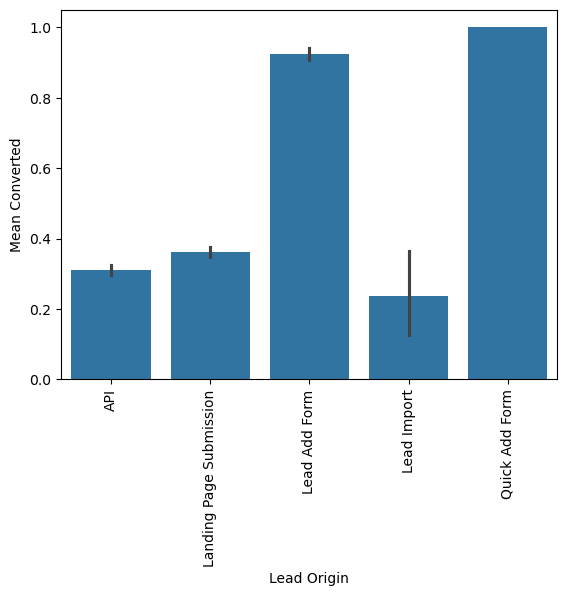

Value             Converted Frequency Converted-Percentage
Olark Chat              448      1755                25.53
Organic Search          436      1154                37.78
Direct Traffic          818      2543                32.17
Google                 1147      2868                39.99
Referral Sites           31       125                 24.8
Welingak Website        140       142                98.59
Reference               490       534                91.76
google                    0         5                  0.0
Facebook                 13        55                23.64
blog                      0         1                  0.0
Pay per Click Ads         0         1                  0.0
bing                      1         6                16.67
Social Media              1         2                 50.0
WeLearn                   1         1                100.0
Click2call                3         4                 75.0
Live Chat                 2         2                100

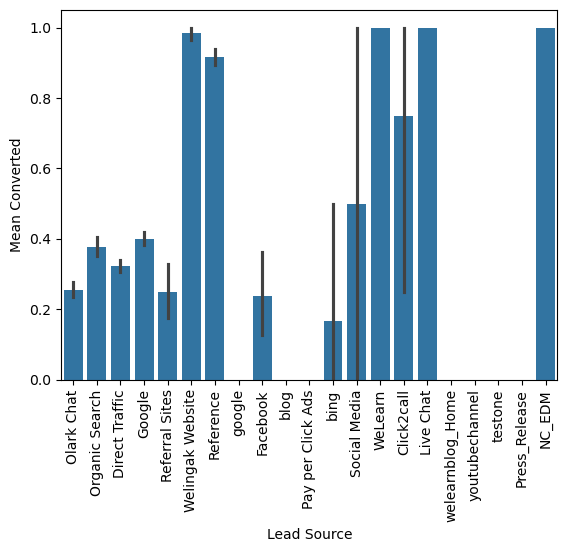

Value Converted Frequency Converted-Percentage
No         3443      8506                40.48
Yes         118       734                16.08


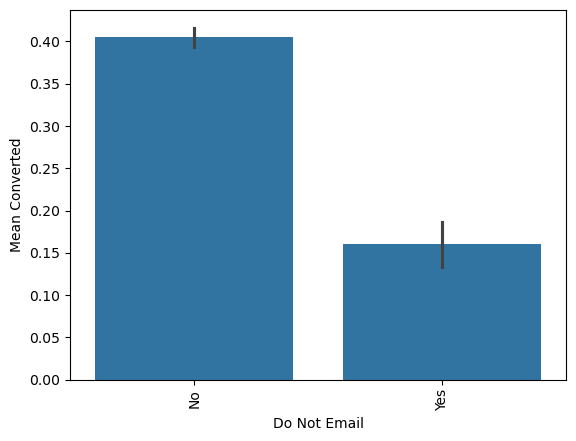

Value Converted Frequency Converted-Percentage
No         3559      9238                38.53
Yes           2         2                100.0


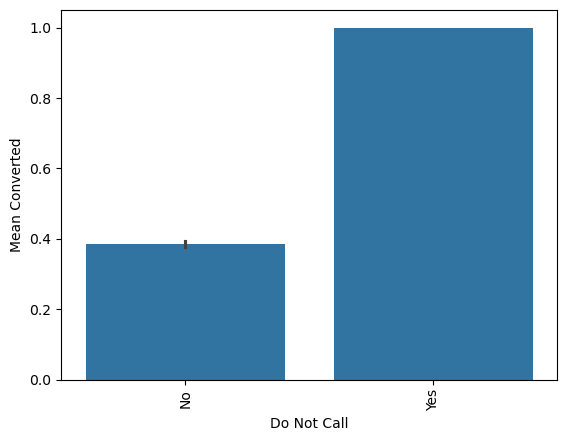

Value                        Converted Frequency Converted-Percentage
Page Visited on Website            151       640                23.59
Email Opened                      1253      3437                36.46
Unreachable                         31        93                33.33
Converted to Lead                   54       428                12.62
Olark Chat Conversation             84       973                 8.63
Email Bounced                       26       326                 7.98
Email Link Clicked                  73       267                27.34
Form Submitted on Website           28       116                24.14
Unsubscribed                        16        61                26.23
Had a Phone Conversation            22        30                73.33
View in browser link Clicked         1         6                16.67
Approached upfront                   9         9                100.0
SMS Sent                          1727      2745                62.91
Visited Booth in Tra

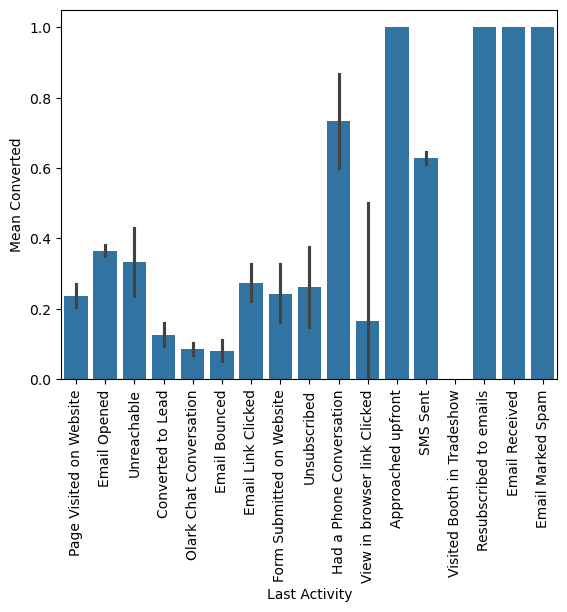

Value                Converted Frequency Converted-Percentage
India                     2401      6492                36.98
Russia                       0         1                  0.0
Kuwait                       0         4                  0.0
Oman                         3         6                 50.0
United Arab Emirates        20        53                37.74
United States               18        69                26.09
Australia                    3        13                23.08
United Kingdom               5        15                33.33
Bahrain                      4         7                57.14
Ghana                        0         2                  0.0
Singapore                   11        24                45.83
Qatar                        1        10                 10.0
Saudi Arabia                 4        21                19.05
Belgium                      0         2                  0.0
France                       3         6                 50.0
Sri Lank

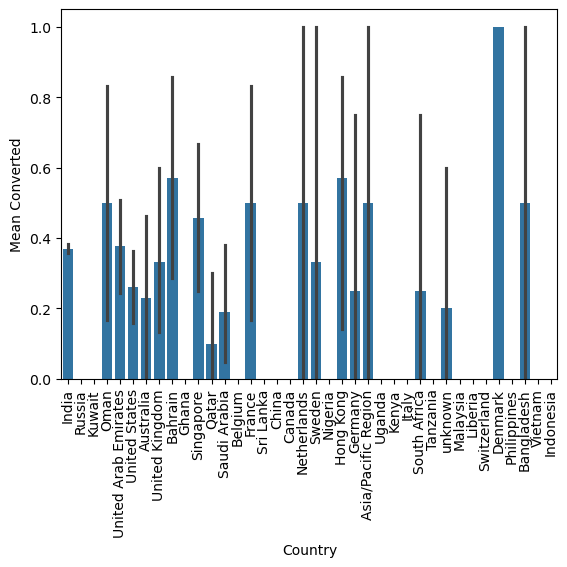

Value                             Converted Frequency Converted-Percentage
Business Administration                 179       403                44.42
Media and Advertising                    85       203                41.87
Supply Chain Management                 151       349                43.27
IT Projects Management                  140       366                38.25
Finance Management                      436       976                44.67
Travel and Tourism                       72       203                35.47
Human Resource Management               388       848                45.75
Marketing Management                    408       838                48.69
Banking, Investment And Insurance       167       338                49.41
International Business                   64       178                35.96
E-COMMERCE                               40       112                35.71
Operations Management                   238       503                47.32
Retail Management        

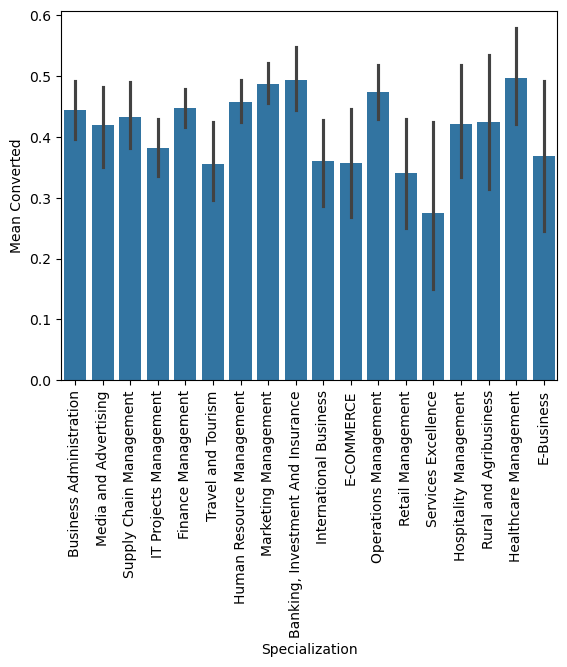

Value                 Converted Frequency Converted-Percentage
Word Of Mouth               152       348                43.68
Other                        75       186                40.32
Online Search               343       808                42.45
Multiple Sources             56       152                36.84
Advertisements               32        70                45.71
Student of SomeSchool       143       310                46.13
Email                        13        26                 50.0
Social Media                 28        67                41.79
SMS                           5        23                21.74
Null                       2714      7250                37.43


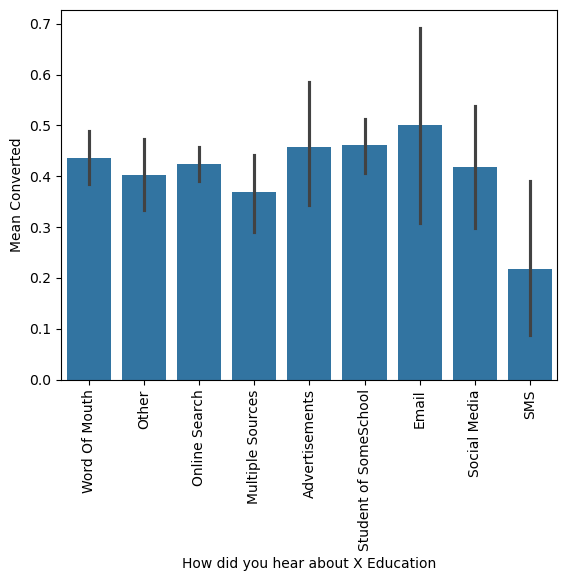

Value                Converted Frequency Converted-Percentage
Unemployed                2441      5600                43.59
Student                     78       210                37.14
Working Professional       647       706                91.64
Businessman                  5         8                 62.5
Other                       10        16                 62.5
Housewife                   10        10                100.0
Null                       370      2690                13.75


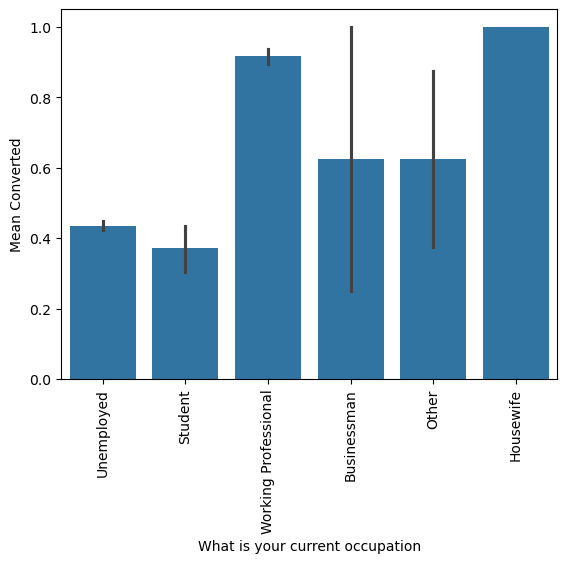

Value                     Converted Frequency Converted-Percentage
Better Career Prospects        3190      6528                48.87
Flexibility & Convenience         1         2                 50.0
Other                             0         1                  0.0
Null                            370      2709                13.66


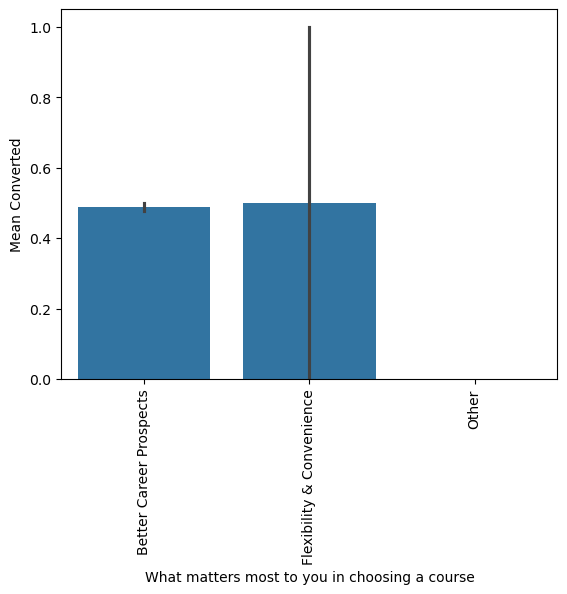

Value Converted Frequency Converted-Percentage
No         3556      9226                38.54
Yes           5        14                35.71


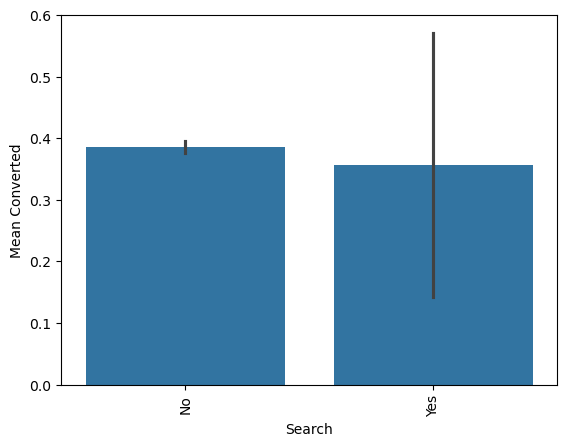

Value Converted Frequency Converted-Percentage
No         3561      9240                38.54


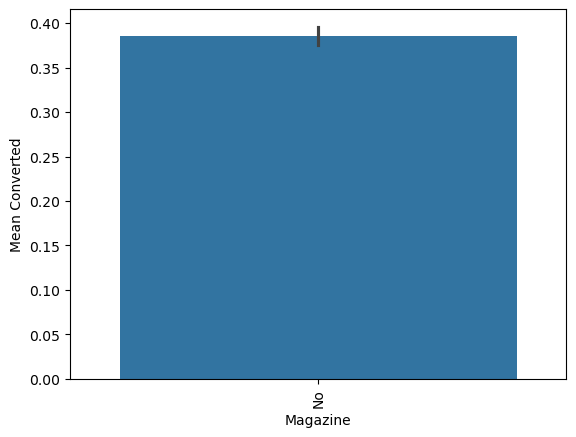

Value Converted Frequency Converted-Percentage
No         3560      9238                38.54
Yes           1         2                 50.0


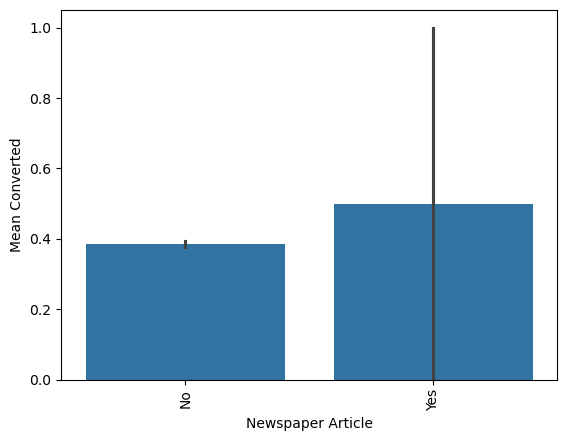

Value Converted Frequency Converted-Percentage
No         3561      9239                38.54
Yes           0         1                  0.0


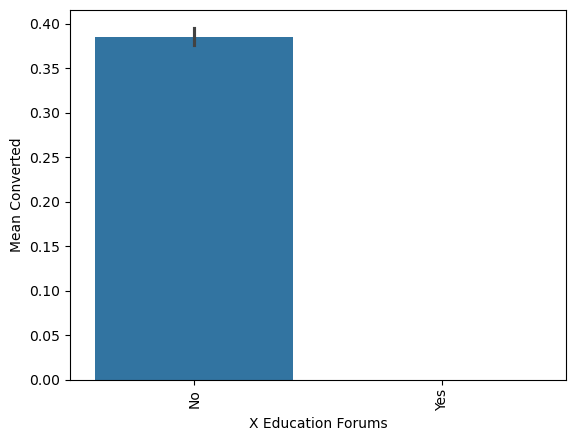

Value Converted Frequency Converted-Percentage
No         3561      9239                38.54
Yes           0         1                  0.0


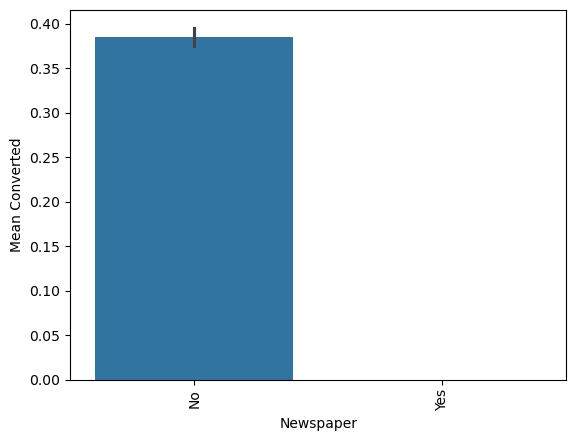

Value Converted Frequency Converted-Percentage
No         3560      9236                38.54
Yes           1         4                 25.0


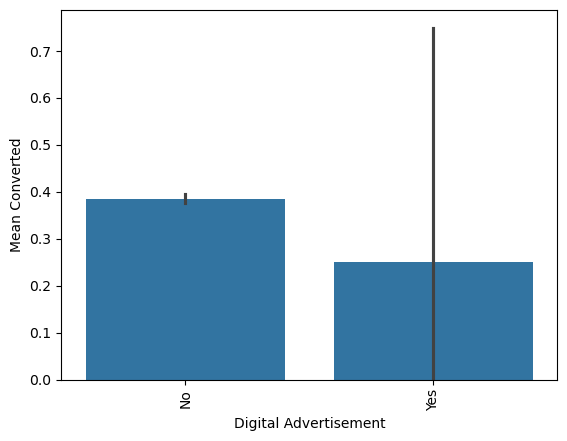

Value Converted Frequency Converted-Percentage
No         3556      9233                38.51
Yes           5         7                71.43


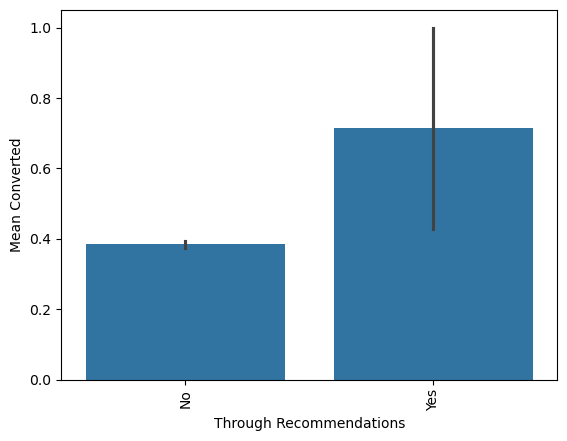

Value Converted Frequency Converted-Percentage
No         3561      9240                38.54


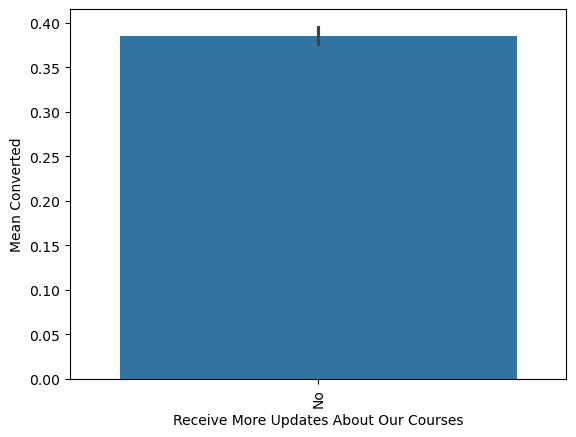

Value                                             Converted Frequency Converted-Percentage
Interested in other courses                              13       513                 2.53
Ringing                                                  34      1203                 2.83
Will revert after reading the email                    2007      2072                96.86
Lost to EINS                                            171       175                97.71
In confusion whether part time or DLP                     1         5                 20.0
Busy                                                    105       186                56.45
switched off                                              4       240                 1.67
in touch with EINS                                        3        12                 25.0
Already a student                                         3       465                 0.65
Diploma holder (Not Eligible)                             1        63                 1.59

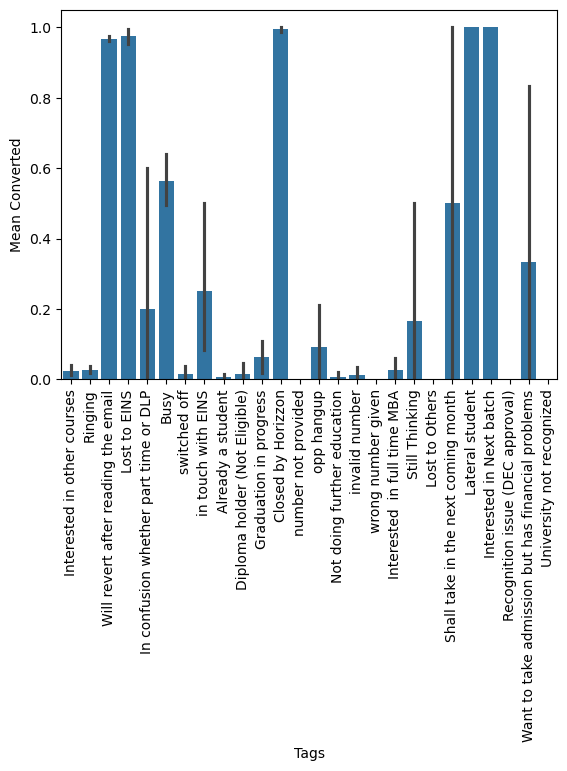

Value             Converted Frequency Converted-Percentage
Low in Relevance        477       583                81.82
Might be               1179      1560                75.58
Not Sure                266      1092                24.36
Worst                    12       601                  2.0
High in Relevance       603       637                94.66
Null                   1024      4767                21.48


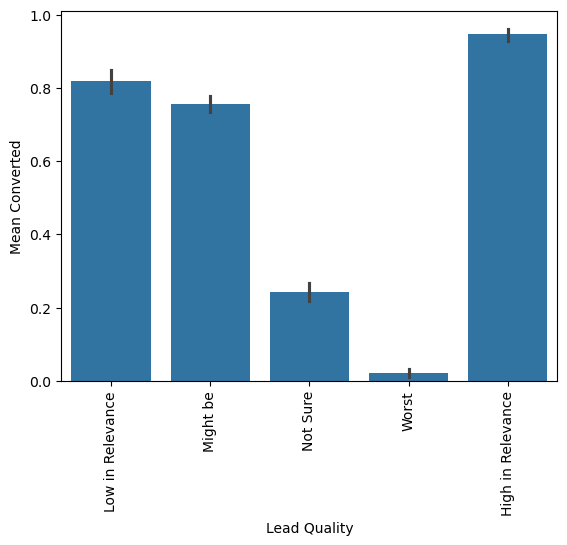

Value Converted Frequency Converted-Percentage
No         3561      9240                38.54


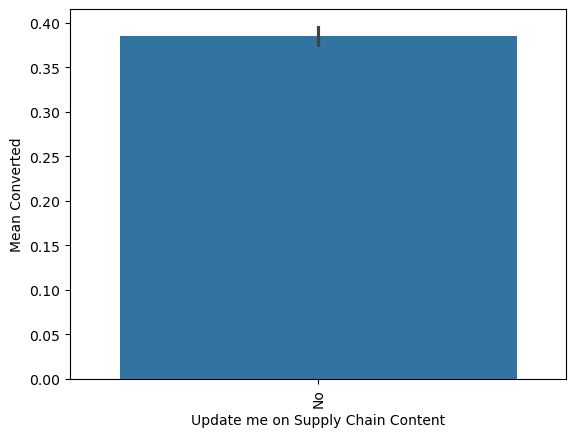

Value Converted Frequency Converted-Percentage
No         3561      9240                38.54


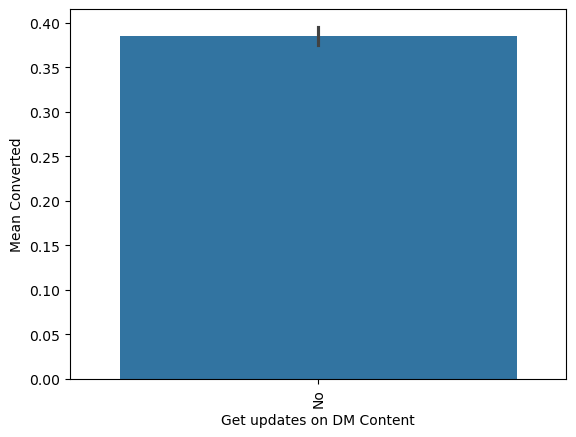

Value                       Converted Frequency Converted-Percentage
Potential Lead                   1267      1613                78.55
Other Leads                       180       487                36.96
Lateral Student                    23        24                95.83
Dual Specialization Student        20        20                100.0
Student of SomeSchool               9       241                 3.73
Null                             2062      6855                30.08


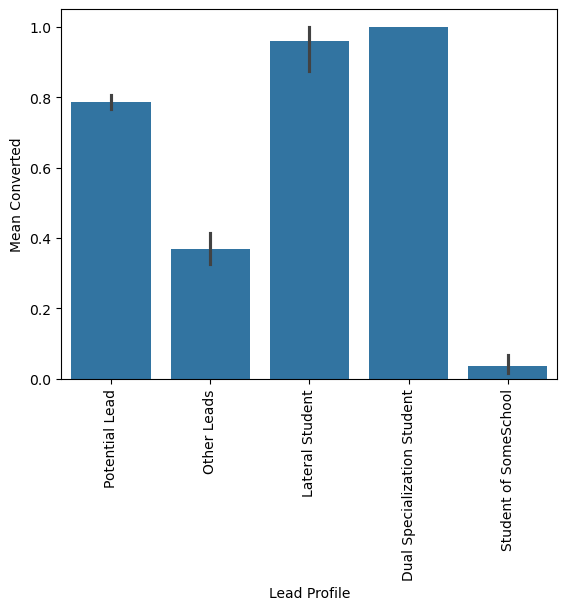

Value                       Converted Frequency Converted-Percentage
Mumbai                           1309      3222                40.63
Thane & Outskirts                 338       752                44.95
Other Metro Cities                155       380                40.79
Other Cities                      276       686                40.23
Other Cities of Maharashtra       201       457                43.98
Tier II Cities                     25        74                33.78
Null                             1257      3669                34.26


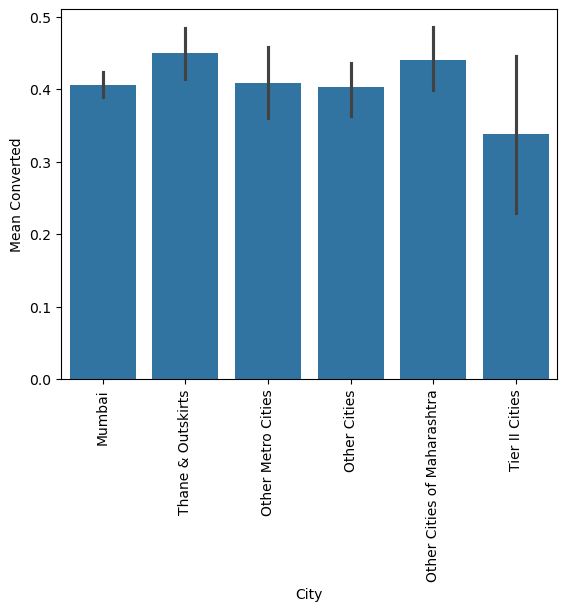

Value     Converted Frequency Converted-Percentage
02.Medium      1630      3839                42.46
01.High         245       821                29.84
03.Low           33       362                 9.12
Null           1653      4218                39.19


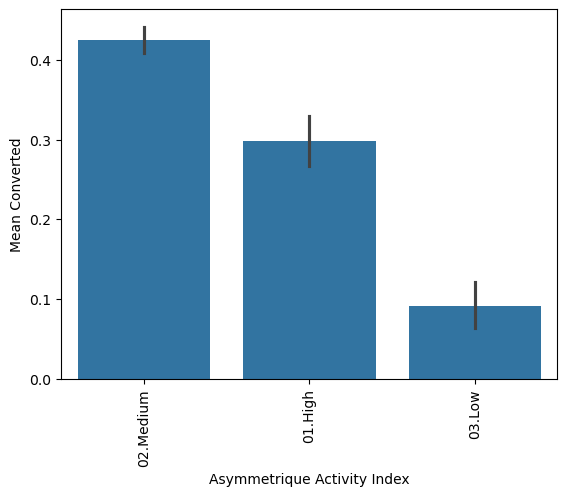

Value     Converted Frequency Converted-Percentage
02.Medium       848      2788                30.42
01.High        1045      2203                47.44
03.Low           15        31                48.39
Null           1653      4218                39.19


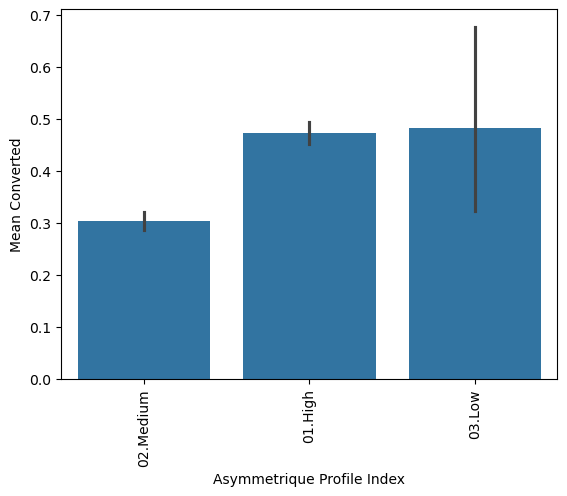

Value Converted Frequency Converted-Percentage
No         3561      9240                38.54


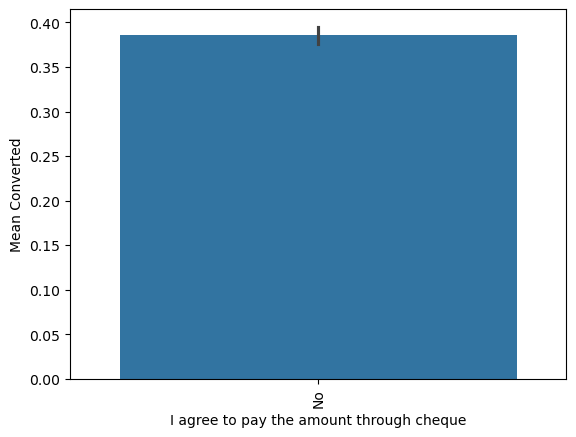

Value Converted Frequency Converted-Percentage
No         2531      6352                39.85
Yes        1030      2888                35.66


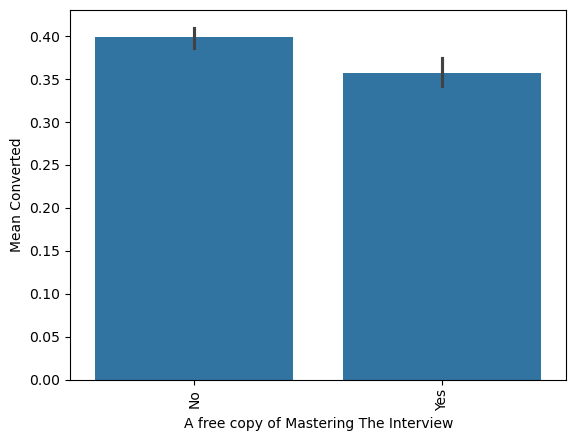

Value                        Converted Frequency Converted-Percentage
Modified                           783      3407                22.98
Email Opened                      1044      2827                36.93
Page Visited on Website             93       318                29.25
Email Bounced                        9        60                 15.0
Email Link Clicked                  45       173                26.01
Unreachable                         22        32                68.75
Unsubscribed                        14        47                29.79
Had a Phone Conversation            13        14                92.86
Olark Chat Conversation             25       183                13.66
SMS Sent                          1508      2172                69.43
Approached upfront                   1         1                100.0
Resubscribed to emails               1         1                100.0
View in browser link Clicked         0         1                  0.0
Form Submitted on We

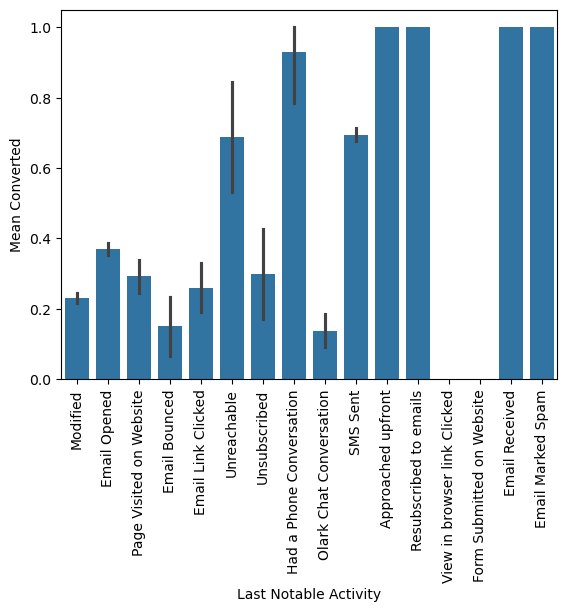

In [13]:
for column in cat_columns:
    checkCategoricalColumn(column, df)

##### Observation
- "Lead Profile" has over 6800 nulls. We can't make any valueable inference from this information
- "What matters most to you in choosing a course" doesnt help much as most value is either "Better Career Prospects" which has 48% Converted percentage while all other is null.
- Few columns have low or zero variance, we will have to remove such columns.
- For "City" column, there are a lot of nulls and the rest of the columns have a very similar converted-percentage. This column can also be safely removed.
- "Country" column can also be removed as most students are from India and there's not enough data about other countries to make an inference.
- "How did you hear about X Education" has over 7000 nulls. It is better to remove this column before further processing
- Asymmetrique Profile and Activity Index also have high null value and very similar Converted-percentage value, so lets remove these columns too.
- "Lead Quality" and "Specialization" also has high null value but they also have high variance in converted-percentage. We will not remove these columns.

##### 2.1.2. Removing columns with high null values

In [14]:
#df = df.drop(columns=["Lead Profile", "How did you hear about X Education", "City","What matters most to you in choosing a course", "Country", "Asymmetrique Profile Index", "Asymmetrique Activity Index"], axis=1)

df = df.drop(columns=["Lead Profile", "How did you hear about X Education", "City","What matters most to you in choosing a course", "Country", "Asymmetrique Profile Index", "Asymmetrique Activity Index"], axis=1)

##### 2.1.3. Removing columns with zero or low variance

In [15]:
description = df.describe(include="all")
threshold = 0.95 #if frequency of the most frequent value is 90% we will drop the column
columns_to_drop = []

for column in df.columns:
    if (
        "count" in description[column]
        and "freq" in description[column]
        and description[column]["freq"] / description[column]["count"] > threshold
    ):
        columns_to_drop.append(column)

print(columns_to_drop)

['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [16]:
df = df.drop(columns=columns_to_drop, axis=1)

### 2.2. Numeric columns

In [17]:
def checkNumericColumn(col_name, df):
    sns.boxplot(df[col_name])
    plt.xlabel(col_name)
    plt.ylabel('Values')
    plt.xticks(rotation=90)
    plt.show()

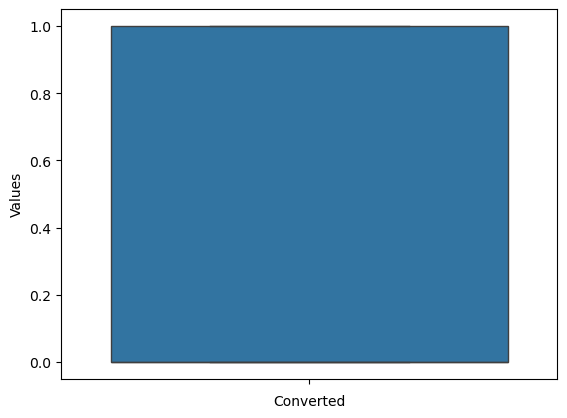

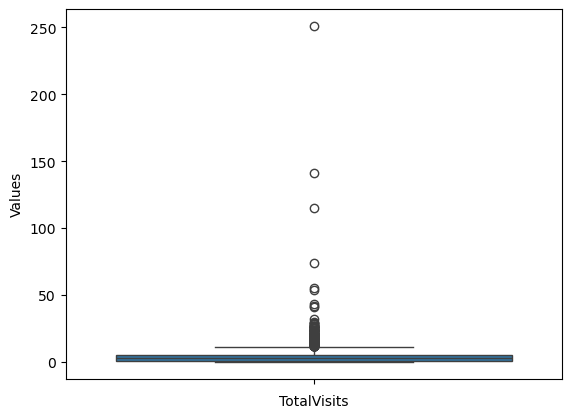

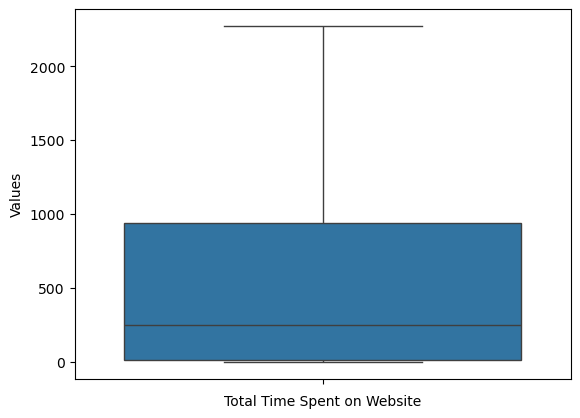

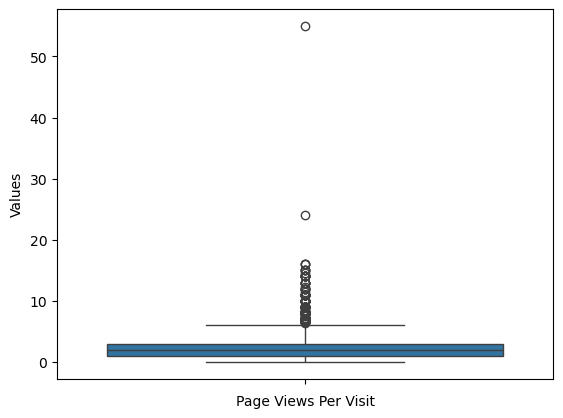

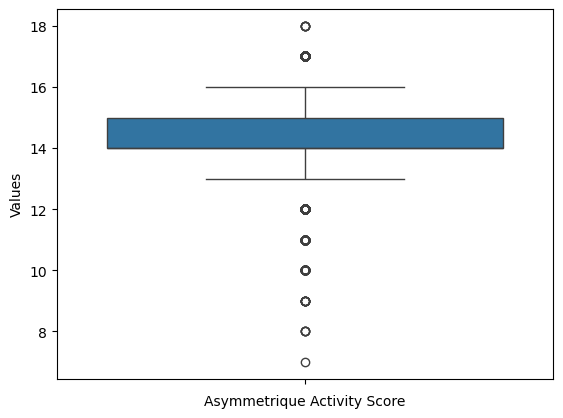

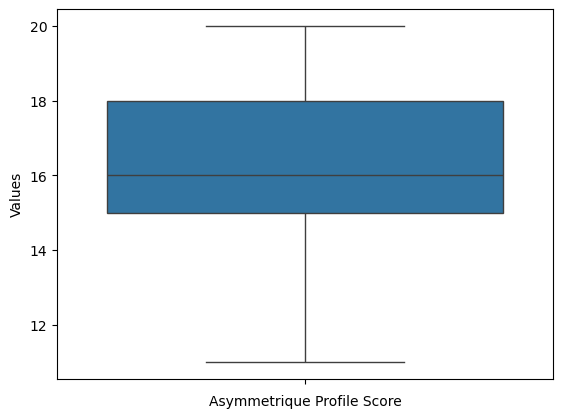

In [18]:
num_columns = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].keys()
for column in num_columns:
    checkNumericColumn(column, df)

#### 2.2.1. Outlier Treatment

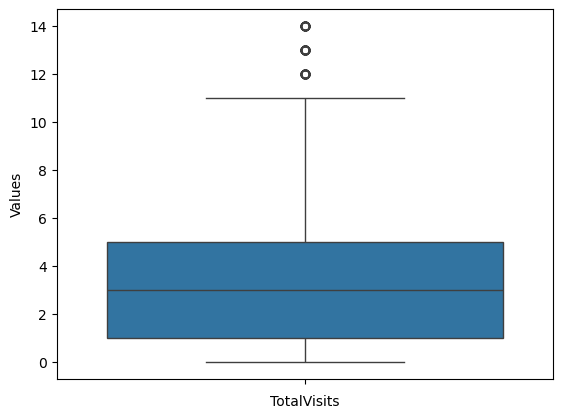

In [19]:
checkNumericColumn("TotalVisits", df[df["TotalVisits"]<15])

In [20]:
df.loc[df["TotalVisits"]>11, "TotalVisits"] = 11

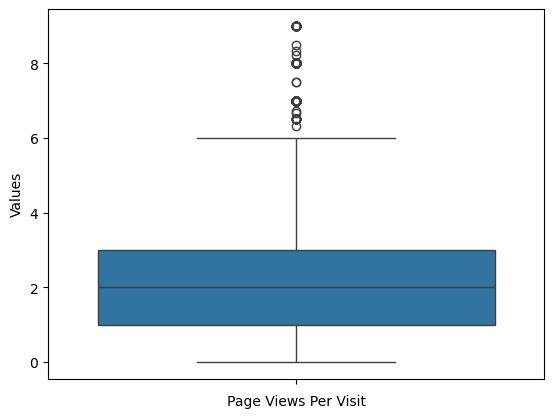

In [21]:
checkNumericColumn("Page Views Per Visit", df[df["Page Views Per Visit"]<10])

In [22]:
df.loc[df["Page Views Per Visit"]>6, "Page Views Per Visit"] = 6

#### 2.2.2. Feature Engineering

Even though Assymetrique Scores have floating point value, they can be considered as catagorical column. Let's take a look on it using `checkCategoricalColumn()` function

Value Converted Frequency Converted-Percentage
 15.0       822      1293                63.57
 14.0       710      1771                40.09
 13.0        98       775                12.65
 17.0        17       349                 4.87
 16.0       228       467                48.82
 11.0         7        95                 7.37
 12.0        23       196                11.73
 10.0         3        57                 5.26
  9.0         0         9                  0.0
  8.0         0         4                  0.0
 18.0         0         5                  0.0
  7.0         0         1                  0.0
Null       1653      4218                39.19


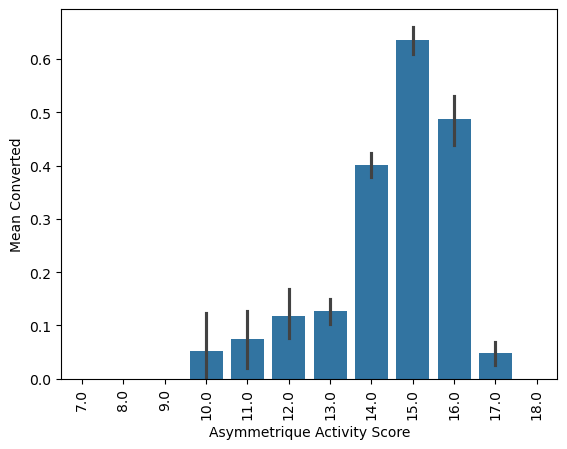

In [23]:
checkCategoricalColumn("Asymmetrique Activity Score", df)

Value Converted Frequency Converted-Percentage
 15.0       500      1759                28.43
 20.0       218       308                70.78
 17.0       262       579                45.25
 18.0       383      1071                35.76
 14.0        57       226                25.22
 16.0       243       599                40.57
 13.0        48       204                23.53
 19.0       182       245                74.29
 12.0        10        22                45.45
 11.0         5         9                55.56
Null       1653      4218                39.19


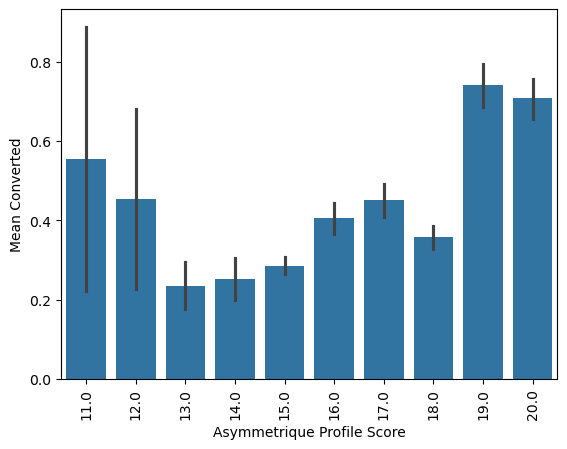

In [24]:
checkCategoricalColumn("Asymmetrique Profile Score", df)

As we can see, in the "Asymmetrique Activity Score", higher is better except the last two values; however, in "Asymmetrique Profile Score", there's not much inference can be made. Let's add them and see how the resulting feature behaves.

In [25]:
df["Asymmetrique Score"] = df["Asymmetrique Profile Score"] + df["Asymmetrique Activity Score"]

Value Converted Frequency Converted-Percentage
 30.0       345       842                40.97
 34.0       214       298                71.81
 33.0       294       498                59.04
 32.0       293       917                31.95
 28.0        59       363                16.25
 29.0       208       725                28.69
 31.0       337       853                39.51
 26.0        12        98                12.24
 35.0        99       124                79.84
 27.0        31       229                13.54
 24.0         0         8                  0.0
 25.0         1        40                  2.5
 23.0         0         6                  0.0
 36.0        14        17                82.35
 20.0         0         1                  0.0
 21.0         0         1                  0.0
 37.0         1         2                 50.0
Null       1653      4218                39.19


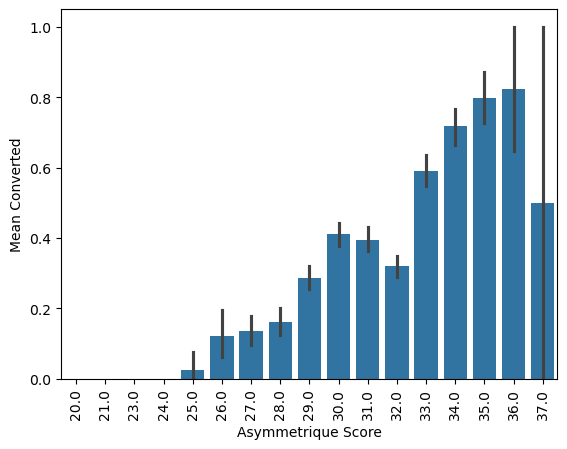

In [26]:
checkCategoricalColumn("Asymmetrique Score", df)

The resulting column has a strong relation on higher value and high converted-percentage. We can remove the original columns.

In [90]:
df = df.drop(columns=["Asymmetrique Profile Score", "Asymmetrique Activity Score"], axis=1)

KeyError: "['Asymmetrique Profile Score', 'Asymmetrique Activity Score'] not found in axis"

As for the null values, The Converted-percentage is very close to 31. Let's set null as 31

In [28]:
df["Asymmetrique Score"].fillna(value=31.0, inplace=True)

In [29]:
df.shape

(9240, 15)

In [30]:
((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)

Lead Quality                              51.590909
Specialization                            36.580087
Tags                                      36.287879
What is your current occupation           29.112554
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Lead Origin                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
Asymmetrique Score                         0.000000
dtype: float64

#### 2.2.3. Imputing Missing value

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
num_columns = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].keys()
((df[num_columns].isnull().sum()/df[num_columns].shape[0])*100).sort_values(ascending=False)

TotalVisits                    1.482684
Page Views Per Visit           1.482684
Converted                      0.000000
Total Time Spent on Website    0.000000
Asymmetrique Score             0.000000
dtype: float64

In [33]:
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

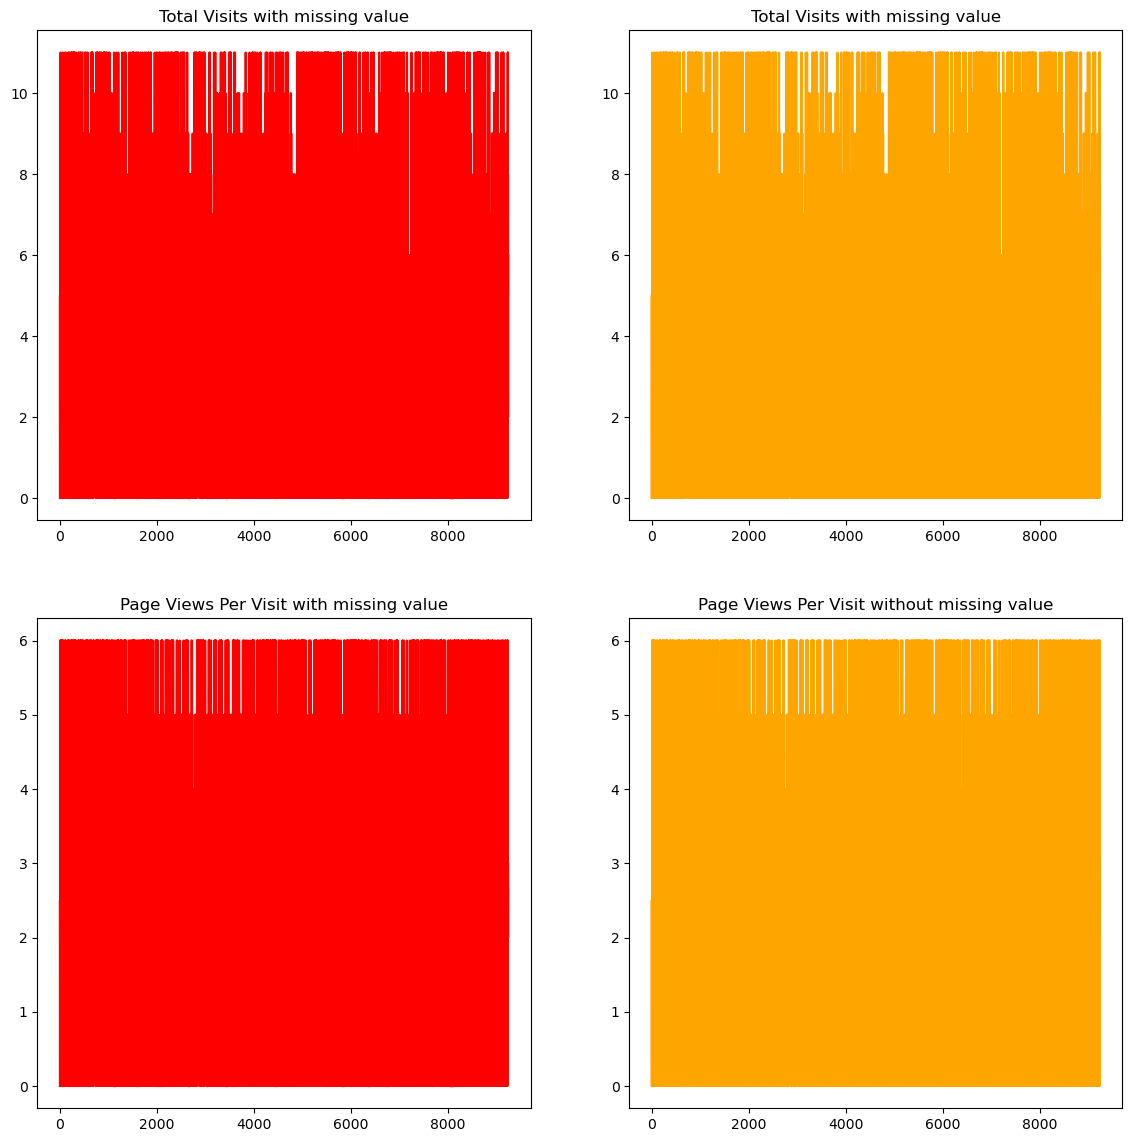

In [34]:
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.title("Total Visits with missing value")
plt.plot(df["TotalVisits"], color='r')

df[["TotalVisits"]] = simple_imputer.fit_transform(df[["TotalVisits"]])
plt.subplot(222)
plt.title("Total Visits with missing value")
plt.plot(df["TotalVisits"], color='orange')

plt.subplot(223)
plt.title("Page Views Per Visit with missing value")
plt.plot(df["Page Views Per Visit"], color='r')

df[["Page Views Per Visit"]] = simple_imputer.fit_transform(df[["Page Views Per Visit"]])
plt.subplot(224)
plt.title("Page Views Per Visit without missing value")
plt.plot(df["Page Views Per Visit"], color='orange')

## 3. Dummy variables creation
We will create dummies in 2 steps. One for variables with high null values and another for variables with less or no nulls.

In [35]:
cat_columns = df.dtypes[~(df.dtypes == 'int64') & ~(df.dtypes == 'float64')].keys()
cat_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [36]:
((df[cat_columns].isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

Lead Quality                              51.590909
Specialization                            36.580087
Tags                                      36.287879
What is your current occupation           29.112554
Last Activity                              1.114719
Lead Source                                0.389610
Lead Origin                                0.000000
Do Not Email                               0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

### 3.1. Variables with Null
Since these columns have high null value, we will treat null as its own category. To do that, we will keep all the values in a variable instead of dropping first using `drop_first=True`.

In [37]:
df_dummies = pd.get_dummies(df[["Tags", "Specialization", "What is your current occupation", "Lead Quality"]])

In [38]:
df_dummies.head()

,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False


In [39]:
df_dummies.shape

(9240, 55)

### 3.2. Variables without Null
Here, we can drop the first value of each column to make our model a little more lightweight

In [40]:
df_dummies_2 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [41]:
df_dummies_2.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [42]:
df_dummies_2.shape

(9240, 57)

In [43]:
df = pd.concat(objs=[df, df_dummies, df_dummies_2], axis=1)

In [44]:
df = df.drop(columns=cat_columns.tolist(), axis=1)

In [45]:
df.shape

(9240, 117)

## 4. Model Building and evaluation
Lets start with Test-Train split, build the model, and evaluate it.

### 4.1 Test-Train split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
y = df["Converted"]
X = df.drop("Converted", axis=1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=400)

In [86]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (6468, 116)
y_train Size (6468,)


### 4.2 Scaling

In [50]:
from sklearn.preprocessing import PowerTransformer

In [87]:
scaler = PowerTransformer()

# scaling only the numeric variables

X_train_scaled = X_train
X_train_scaled[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Asymmetrique Score']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Asymmetrique Score']])
X_train_scaled = X_train_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

Scaling test data using only `.tranform()` to use later

In [88]:
X_test_scaled = X_test
X_test_scaled[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Asymmetrique Score']] = scaler.transform(X_test_scaled[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Asymmetrique Score']])
X_test_scaled = X_test_scaled.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### 4.3 Building the model
Lets start with building a base model then try to tweak it as we go

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [89]:
# Logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
print("train data score", logreg.score(X_train_scaled, y_train))

# X_test_scaled = scaler.transform(X_test)
print("test data score", logreg.score(X_test_scaled, y_test))

train data score 0.935374149659864
test data score 0.9383116883116883


##### Precision and recall

In [55]:
predicted = logreg.predict(X_test_scaled)
print("confusion matrix")
print(confusion_matrix(y_test, predicted))
print("Classigication report")
print(classification_report(y_test, predicted))

confusion matrix
[[1621   56]
 [ 118  977]]
Classigication report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1677
           1       0.95      0.89      0.92      1095

    accuracy                           0.94      2772
   macro avg       0.94      0.93      0.93      2772
weighted avg       0.94      0.94      0.94      2772



Our baseline model has a very high accuracy but recall is not good. We can fix this by later by selecting appropriate threshold. For now, lets work on making the model a little more lightweight by removing the features that we don't need.

In [56]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
rfe = RFE(logreg, n_features_to_select=20) #RFE with 20 variables as output 
rfe = rfe.fit(X_train_scaled, y_train)

In [58]:
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 68),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 45),
 ('Asymmetrique Score', False, 38),
 ('Tags_Already a student', True, 1),
 ('Tags_Busy', False, 11),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Diploma holder (Not Eligible)', True, 1),
 ('Tags_Graduation in progress', True, 1),
 ('Tags_In confusion whether part time or DLP', False, 17),
 ('Tags_Interested  in full time MBA', True, 1),
 ('Tags_Interested in Next batch', False, 54),
 ('Tags_Interested in other courses', True, 1),
 ('Tags_Lateral student', False, 29),
 ('Tags_Lost to EINS', True, 1),
 ('Tags_Lost to Others', False, 14),
 ('Tags_Not doing further education', True, 1),
 ('Tags_Recognition issue (DEC approval)', False, 18),
 ('Tags_Ringing', True, 1),
 ('Tags_Shall take in the next coming month', False, 49),
 ('Tags_Still Thinking', False, 15),
 ('Tags_University not recognized', False, 61),
 ('Tags_Want to take admission but has financial problems', False, 43)

In [59]:
col = X_train.columns[rfe.support_].tolist()
col

['Tags_Already a student',
 'Tags_Closed by Horizzon',
 'Tags_Diploma holder (Not Eligible)',
 'Tags_Graduation in progress',
 'Tags_Interested  in full time MBA',
 'Tags_Interested in other courses',
 'Tags_Lost to EINS',
 'Tags_Not doing further education',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_invalid number',
 'Tags_number not provided',
 'Tags_opp hangup',
 'Tags_switched off',
 'Tags_wrong number given',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Lead Quality_Worst',
 'Lead Source_Welingak Website',
 'Last Activity_SMS Sent']

In [60]:
X_train_rfe = X_train_scaled[col].astype(float)

In [61]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Tags_Already a student                                6468 non-null   float64
 1   Tags_Closed by Horizzon                               6468 non-null   float64
 2   Tags_Diploma holder (Not Eligible)                    6468 non-null   float64
 3   Tags_Graduation in progress                           6468 non-null   float64
 4   Tags_Interested  in full time MBA                     6468 non-null   float64
 5   Tags_Interested in other courses                      6468 non-null   float64
 6   Tags_Lost to EINS                                     6468 non-null   float64
 7   Tags_Not doing further education                      6468 non-null   float64
 8   Tags_Ringing                                          6468

In [62]:
X_train_sm = sm.add_constant(X_train_rfe)

logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1372.5
Date:                Sat, 23 Dec 2023   Deviance:                       2745.0
Time:                        22:57:18   Pearson chi2:                 1.05e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5954
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5644      0.088    -29.059      0.000      -2.737      -2.391
Tags_Already a student                                  -4.1990      0.742     -5.657      0.000      -5.654      -2.744
Tags_Closed by Horizzon                                  5.9488      1.010      5.889      0.000       3.969       7.929
Tags_Diploma holder (Not Eligible)                     -24.0387   1.83e+04     -0.001      0.999   -3.59e+04    3.59e+04
Tags_Graduation in progress                             -2.3661      0.502     -4.717      0.000      -3.349      -1.383
Tags_Interested  in full time MBA                       -3.4725      0.743     -4.674      0.000      -4.929      -2.016
Tags_Interested in other courses                        -3.2202      0.327     -9.853      0.000      -3.861      -2.580
Tags_Lost to EINS                                        5.7091      0.745      7.664      0.000       4.249       7.169
Tags_Not doing further education                        -4.1065      1.032     -3.981      0.000      -6.128      -2.085
Tags_Ringing                                            -4.3704      0.231    -18.886      0.000      -4.824      -3.917
Tags_Will revert after reading the email                 3.4079      0.183     18.622      0.000       3.049       3.767
Tags_invalid number                                     -4.7034      1.025     -4.589      0.000      -6.712      -2.695
Tags_number not provided                               -25.0342   2.66e+04     -0.001      0.999   -5.21e+04    5.21e+04
Tags_opp hangup                                         -2.9004      0.784     -3.700      0.000      -4.437      -1.364
Tags_switched off                                       -4.7929      0.521     -9.193      0.000      -5.815      -3.771
Tags_wrong number given                                -25.2968   2.19e+04     -0.001      0.999   -4.29e+04    4.28e+04
What is your current occupation_Unemployed               2.2124      0.115     19.295      0.000       1.988       2.437
What is your current occupation_Working Professional     2.3853      0.345      6.909      0.000       1.709       3.062
Lead Quality_Worst                                      -1.5071      0.745     -2.024      0.043      -2.966      -0.048
Lead Source_Welingak Website                             3.0009      0.733      4.096      0.000       1.565       4.437
Last Activity_SMS Sent                                   2.0588      0.110     18.785      0.000       1.844       2.274
========================================================================================================================
"""

In [63]:
def checkVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [64]:
checkVIF(X_train_sm.astype(int))

                                                Features   VIF
0                                                  const  3.51
16            What is your current occupation_Unemployed  2.49
10              Tags_Will revert after reading the email  2.28
17  What is your current occupation_Working Professional  1.86
1                                 Tags_Already a student  1.85
9                                           Tags_Ringing  1.82
18                                    Lead Quality_Worst  1.77
6                       Tags_Interested in other courses  1.41
8                       Tags_Not doing further education  1.30
2                                Tags_Closed by Horizzon  1.28
14                                     Tags_switched off  1.20
20                                Last Activity_SMS Sent  1.16
5                      Tags_Interested  in full time MBA  1.13
3                     Tags_Diploma holder (Not Eligible)  1.09
4                            Tags_Graduation in progres

Here, we will check and remove columns that have either high p value or a high VIF or both. Lets remove them one at a time.

In [65]:
def trainAndCheckVIF(df=X_train_sm):
    logm2 = sm.GLM(y_train, df, family = sm.families.Binomial())
    res = logm2.fit()
    print(res.summary())
    checkVIF(df)

In [66]:
X_train_sm = X_train_sm.drop("Tags_wrong number given", axis=1)
trainAndCheckVIF(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1401.9
Date:                Sat, 23 Dec 2023   Deviance:                       2803.7
Time:                        22:57:18   Pearson chi2:                 1.03e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5918
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [67]:
X_train_sm = X_train_sm.drop("Tags_number not provided", axis=1)
trainAndCheckVIF(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1417.5
Date:                Sat, 23 Dec 2023   Deviance:                       2835.0
Time:                        22:57:18   Pearson chi2:                 1.02e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5898
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [68]:
X_train_sm = X_train_sm.drop("Tags_Diploma holder (Not Eligible)", axis=1)
trainAndCheckVIF(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1433.5
Date:                Sat, 23 Dec 2023   Deviance:                       2867.0
Time:                        22:57:18   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5877
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

As you can see, we have eliminated all the columns with high p or VIF values. we can go ahead and evaluate the model now.

### 4.4 Model Evaluation

Let's get the final model for evalutation

In [69]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [70]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6468 non-null   float64
 1   Tags_Already a student                                6468 non-null   float64
 2   Tags_Closed by Horizzon                               6468 non-null   float64
 3   Tags_Graduation in progress                           6468 non-null   float64
 4   Tags_Interested  in full time MBA                     6468 non-null   float64
 5   Tags_Interested in other courses                      6468 non-null   float64
 6   Tags_Lost to EINS                                     6468 non-null   float64
 7   Tags_Not doing further education                      6468 non-null   float64
 8   Tags_Ringing                                          6468

In [71]:
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1433.5
Date:                Sat, 23 Dec 2023   Deviance:                       2867.0
Time:                        22:57:18   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5877
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5587      0.087    -29.339      0.000      -2.730      -2.388
Tags_Already a student                                  -3.7396      0.723     -5.172      0.000      -5.157      -2.322
Tags_Closed by Horizzon                                  6.1485      1.009      6.095      0.000       4.171       8.125
Tags_Graduation in progress                             -2.0407      0.500     -4.078      0.000      -3.021      -1.060
Tags_Interested  in full time MBA                       -3.1287      0.742     -4.219      0.000      -4.582      -1.675
Tags_Interested in other courses                        -2.9092      0.324     -8.983      0.000      -3.544      -2.274
Tags_Lost to EINS                                        6.0520      0.782      7.739      0.000       4.519       7.585
Tags_Not doing further education                        -3.6766      1.026     -3.584      0.000      -5.687      -1.666
Tags_Ringing                                            -4.0629      0.228    -17.851      0.000      -4.509      -3.617
Tags_Will revert after reading the email                 3.6186      0.180     20.086      0.000       3.266       3.972
Tags_invalid number                                     -4.3515      1.024     -4.249      0.000      -6.359      -2.344
Tags_opp hangup                                         -2.5943      0.782     -3.317      0.001      -4.127      -1.061
Tags_switched off                                       -4.4798      0.520     -8.622      0.000      -5.498      -3.461
What is your current occupation_Unemployed               1.9273      0.110     17.568      0.000       1.712       2.142
What is your current occupation_Working Professional     2.2000      0.343      6.406      0.000       1.527       2.873
Lead Quality_Worst                                      -2.5970      0.622     -4.177      0.000      -3.816      -1.378
Lead Source_Welingak Website                             3.2868      0.732      4.491      0.000       1.852       4.721
Last Activity_SMS Sent                                   2.0227      0.106     19.120      0.000       1.815       2.230
========================================================================================================================
"""

In [72]:
y_train_pred = res.predict(sm.add_constant(X_train_sm))
y_train_pred.head()

0    0.009065
1    0.347203
2    0.009065
3    0.064677
4    0.347203
dtype: float64

##### Accuracy and related matrix

In [73]:
y_train_pred_final = pd.DataFrame({"Actual":y_train.values, "Probability":y_train_pred})

Let's take 0.5 as threshold for now. We will find a better threshold in a bit.

In [74]:
y_train_pred_final["Predicted"] = y_train_pred_final["Probability"].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Actual,Probability,Predicted
0,0,0.009065,0
1,0,0.347203,0
2,0,0.009065,0
3,0,0.064677,0
4,0,0.347203,0


In [75]:
X_test_rfe = X_test_scaled[X_train_sm.columns[1:]].astype(float) #remove const
X_test_sm = sm.add_constant(X_test_rfe)
X_test_sm = X_test_sm.reset_index(drop=True)

In [76]:
print(X_train_sm.shape)
print(X_test_sm.shape)

(6468, 18)
(2772, 18)


In [77]:
y_test_pred = res.predict(X_test_sm)

In [78]:
y_test_pred_final = pd.DataFrame({"Actual":y_test.values, "Probability":y_test_pred})
y_test_pred_final["Predicted"] = y_test_pred_final["Probability"].map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Actual,Probability,Predicted
0,1,0.369133,0
1,1,0.993373,1
2,1,0.963028,1
3,0,0.012482,0
4,1,0.951994,1


In [79]:
confusion_matrix(y_train_pred_final["Actual"], y_train_pred_final["Predicted"] )

array([[3890,  112],
       [ 447, 2019]])

In [80]:
confusion_matrix(y_test_pred_final["Actual"], y_test_pred_final["Predicted"] )

array([[1627,   50],
       [ 182,  913]])

In [81]:
train_accuracy = accuracy_score(y_train_pred_final["Actual"], y_train_pred_final["Predicted"])
test_accuracy = accuracy_score(y_test_pred_final["Actual"], y_test_pred_final["Predicted"])
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

Train accuracy 0.9135745207173779
Test accuracy 0.9163059163059163


In [82]:
print("Train", classification_report(y_train_pred_final["Actual"], y_train_pred_final["Predicted"]))
print("Test", classification_report(y_test_pred_final["Actual"], y_test_pred_final["Predicted"]))

Train               precision    recall  f1-score   support

           0       0.90      0.97      0.93      4002
           1       0.95      0.82      0.88      2466

    accuracy                           0.91      6468
   macro avg       0.92      0.90      0.91      6468
weighted avg       0.92      0.91      0.91      6468

Test               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1677
           1       0.95      0.83      0.89      1095

    accuracy                           0.92      2772
   macro avg       0.92      0.90      0.91      2772
weighted avg       0.92      0.92      0.92      2772



Lets calculate ROC

In [83]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [84]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final["Actual"], y_train_pred_final["Probability"], drop_intermediate=False)

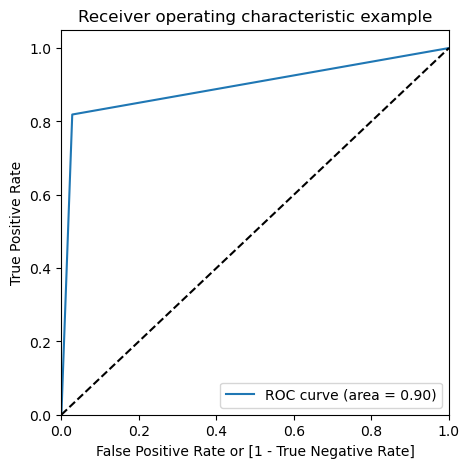

In [85]:
draw_roc(y_train_pred_final["Actual"], y_train_pred_final["Predicted"])

In [ ]:
## K-fold cross validation

In [91]:
from sklearn.model_selection import cross_val_score

In [94]:
score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_test, y_test,cv=10)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.95323741 0.94244604 0.9133574  0.92057762 0.89891697 0.93862816
 0.94223827 0.92057762 0.95306859 0.93862816]
Avg : 0.9321676233020803
